<a href="https://colab.research.google.com/github/yanwu2001/DOE/blob/main/GitHub_DOE2ML_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Task 1: polynomial regression

*Updated 8/25/24*

We start by loading all the required packages.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
# reduce display precision on numpy arrays
np.set_printoptions(precision=1)
import pandas as pd
# reduce display precision on pandas dataframes
pd.set_option('display.precision', 1)
from sklearn import set_config
set_config(transform_output="pandas")
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
import joblib

Load data from the collective memory about this catapult stored as a dadabase in .csv file from GitHub.


In [ ]:
#updated raw data url
#url='https://raw.githubusercontent.com/yanwu2001/DOE-ML-Public/main/PhysicalCatapult/Catapult_ABCDEFGy_raw.csv'
#example data for ML task1 polynomial regression
url='https://raw.githubusercontent.com/yanwu2001/DOE-ML-Public/main/PhysicalCatapult/ML_Catapult_ABC_y.csv'
df=pd.read_csv(url)
print(df.head())
print(df.info())
print(df.describe())

     ID  Combo#  ball_mass  firing _height  band_length  launch_distance  \
0  run1       0       61.3            18.0         41.8            178.6   
1  run2       8       94.1            23.0         43.0            147.8   
2  run3       3       22.9            23.0         40.6            146.5   
3  run4       1       22.9            13.0         40.6            233.7   
4  run5       2       22.9            13.0         43.0            275.4   

  short_long  
0      short  
1      short  
2      short  
3       long  
4       long  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               100 non-null    object 
 1   Combo#           100 non-null    int64  
 2   ball_mass        100 non-null    float64
 3   firing _height   100 non-null    float64
 4   band_length      100 non-null    float64
 5   launch_distance  100 no

What we load is just a database.  We need to define what is our training label y and what are the features of the input data.  

Some data features are not relavent: ID, Combo#.
For the known fixed values, we can drop them too.
We can also clean up data that has missing values by imputing. Nothing will be changed if there is no missing values in the orignal data set.

In [ ]:
# separate the predictors and the labels
# define labels
y_data=df['launch_distance'].copy()
# get rid of unrelavent data
X_data=df.drop(['ID','Combo#','launch_distance','short_long'],axis=1)
#impute missing values with the mean of the that attrubute,
# also available strategies: "median" "most_frequent"
imputer = SimpleImputer(strategy='mean')
X_data = imputer.fit_transform(X_data)

We will seperature the dataset into training set, validation set, and testing set

In [ ]:
# Get 60% of the dataset as the training set. Put the remaining 40% in temporary variables: x_ and y_.
X_train, X_, y_train, y_ = train_test_split(X_data, y_data, test_size=0.40, random_state=1)

# Split the 40% subset above into two: one half for cross validation and the other for the test set
X_cv, X_test, y_cv, y_test = train_test_split(X_, y_, test_size=0.50, random_state=1)

# Delete temporary variables
del X_, y_
print(f"the shape of the training set (input) is: {X_train.shape}")
print(f"the shape of the training set (target) is: {y_train.shape}\n")
print(f"the shape of the cross validation set (input) is: {X_cv.shape}")
print(f"the shape of the cross validation set (target) is: {y_cv.shape}\n")
print(f"the shape of the test set (input) is: {X_test.shape}")
print(f"the shape of the test set (target) is: {y_test.shape}")
print("the first 5 elements in X_train are :\n", X_train[:5])

the shape of the training set (input) is: (60, 3)
the shape of the training set (target) is: (60,)

the shape of the cross validation set (input) is: (20, 3)
the shape of the cross validation set (target) is: (20,)

the shape of the test set (input) is: (20, 3)
the shape of the test set (target) is: (20,)
the first 5 elements in X_train are :
     ball_mass  firing _height  band_length
86       68.5             7.4         47.3
53       94.1            19.0         42.0
77       22.9            14.2         33.0
15       22.9            13.0         43.0
83       61.3            10.4         39.5


Maching learning algorithms do not work perform well when the input numerical attributes have very different scales.  We will scale the input so that all data are roughly between -1 to 1.  The same scaling rule need to apply for new data or during production in order for the model to work.

In [ ]:

# Create a StandardScaler object for the training set, use the same scaling for all data
x_scaler = StandardScaler()
X = x_scaler.fit_transform(X_train)
print(X.head())
print(X.describe())
#y_tr_transformer = FunctionTransformer(np.log, inverse_func=np.exp)
#y_tr = y_transformer.fit_transform(y_train)
y=y_train
#print(y_tr.head())
# never use fit() or fit_transform for anything else than the training set.
# to ensure other data use the same tranformer, use transform()


    ball_mass  firing _height  band_length
86        0.4            -1.4      9.9e-01
53        1.2             0.7     -5.9e-02
77       -1.1            -0.2     -1.8e+00
15       -1.1            -0.4      1.4e-01
83        0.1            -0.8     -5.5e-01
       ball_mass  firing _height  band_length
count    6.0e+01         6.0e+01      6.0e+01
mean    -1.3e-16        -4.3e-17     -3.2e-16
std      1.0e+00         1.0e+00      1.0e+00
min     -1.1e+00        -1.5e+00     -1.8e+00
25%     -1.1e+00        -8.4e-01     -3.4e-01
50%      1.2e-01        -1.5e-01      4.1e-02
75%      1.2e+00         8.3e-01      7.4e-01
max      1.2e+00         1.4e+00      1.9e+00


We will first train a linear model (1st order polynomial)

In [ ]:

# 1st order model
#train the model
model1 = LinearRegression()
model1.fit(X,y)
print("the fitting parameters for the 1st order model are:\n")
print("the weights are ", model1.coef_)
print("the intercept is", model1.intercept_)

# Predict on the training data
y_pred_tr = model1.predict(X)
#y_pred=y_transformer.inverse_transform(y_pred_tr)
# Calculate RMean Squared Error by selecting squared=False,
# the default is Mean Squared Error
mse_t = mean_squared_error(y_train, y_pred_tr, squared=False)
# Print the RMSE
print('Root Mean Squared Error for training set:', mse_t)

the fitting parameters for the 1st order model are:

the weights are  [-20.6 -35.6  74.4]
the intercept is 205.79333333333338
Root Mean Squared Error for training set: 40.0958720166386


Evaluate the model with cross validation set

In [ ]:
#
# apply the same scaling and transformation
X_scaled_cv = x_scaler.transform(X_cv)
#y_log_cv = y_transformer.transform(y_cv)
# Predict on the cross validation data
y_pred_cv = model1.predict(X_scaled_cv)
# Calculate Mean Squared Error
mse_cv = mean_squared_error(y_cv, y_pred_cv,squared=False)
# Print the MSE
print('Root Mean Squared Error for cross validation set:', mse_cv)

Root Mean Squared Error for cross validation set: 42.787780021741796


By increasing the order of the moplynomial model, we will reduce the bias of the model and avoid underfitting.

In [ ]:
# 2nd order polynomial regression
# Create a PolynomialFeatures object with degree 2, drop bias (1 in the first column)
poly = PolynomialFeatures(degree=2,include_bias=False)

# Fit and transform the data to create polynomial features
X_poly = poly.fit_transform(X_train)
# Check the original and polynomial features
print("Original X:", X_train.head())
print("Polynomial X:", X_poly.head())

#Scale the training set
poly_scaler = StandardScaler()
X = poly_scaler.fit_transform(X_poly)
y=y_train

Original X:     ball_mass  firing _height  band_length
86       68.5             7.4         47.3
53       94.1            19.0         42.0
77       22.9            14.2         33.0
15       22.9            13.0         43.0
83       61.3            10.4         39.5
Polynomial X:     ball_mass  firing _height  band_length  ball_mass^2  \
86       68.5             7.4         47.3       4692.2   
53       94.1            19.0         42.0       8854.8   
77       22.9            14.2         33.0        524.4   
15       22.9            13.0         43.0        524.4   
83       61.3            10.4         39.5       3757.7   

    ball_mass firing _height  ball_mass band_length  firing _height^2  \
86                     506.9                 3240.0              54.8   
53                    1787.9                 3952.2             361.0   
77                     325.2                  755.7             201.6   
15                     297.7                  984.7             169.0

In [ ]:
#train the model (2nd order)
model2 = LinearRegression()
model2.fit(X,y)
print("the fitting parameters for the 2nd order model are:\n")
print("the weights are ", model2.coef_)
print("the intercept is", model2.intercept_)

# Predict on the training data
y_pred_tr = model2.predict(X)
# Calculate Mean Squared Error
mse_t = mean_squared_error(y_train, y_pred_tr, squared=False)
# Print the MSE
print('Root Mean Squared Error for training set:', mse_t)

the fitting parameters for the 2nd order model are:

the weights are  [-73.   49.3 183.3  81.6  36.5 -60.8 -42.4 -68.8 -77.9]
the intercept is 205.79333333333315
Root Mean Squared Error for training set: 35.295770592164594


Increasing the order of the polynomial may also lead to overfitting or high variance.  We need to check that using cross validation set.

In [ ]:
# Fit and transform the validation data to create polynomial features
X_poly = poly.fit_transform(X_cv)
# Check the original and polynomial features
#print("Original X:", X_cv.head())
#print("Polynomial X:", X_poly.head())

#Scale the validation set
X = poly_scaler.transform(X_poly)

# Predict on the cross validation data
y_pred_cv = model2.predict(X)
# Calculate Mean Squared Error
mse_cv = mean_squared_error(y_cv, y_pred_cv,squared=False)
# Print the MSE
print('Root Mean Squared Error for cross validation set:', mse_cv)


Root Mean Squared Error for cross validation set: 42.62437414624094


By using 2nd order model, we see a decrease in RMSE in training set. The RMSE does not increase. That is good news.  
Going forward, we can use of make_pipeline to do exactly the same thing.

In [ ]:
preprocessing=make_pipeline(PolynomialFeatures(degree=2,include_bias=False),StandardScaler())
model=LinearRegression()
train_pipe=make_pipeline(preprocessing,model)
train_pipe.fit(X_train,y_train)
print("the fitting parameters for the 2nd order model are:\n")
print("the weights are ", train_pipe[-1].coef_)
print("the intercept is", train_pipe[-1].intercept_)
y_pred_tr=train_pipe.predict(X_train)
mse_t = mean_squared_error(y_train, y_pred_tr, squared=False)
# Print the MSE
print('Root Mean Squared Error for training set:', mse_t)

y_pred_cv=train_pipe.predict(X_cv)
mse_cv = mean_squared_error(y_cv, y_pred_cv,squared=False)
# Print the MSE
print('Root Mean Squared Error for cross validation set:', mse_cv)


the fitting parameters for the 2nd order model are:

the weights are  [-73.   49.3 183.3  81.6  36.5 -60.8 -42.4 -68.8 -77.9]
the intercept is 205.79333333333315
Root Mean Squared Error for training set: 35.295770592164594
Root Mean Squared Error for cross validation set: 42.62437414624094


Above shows pipeline does the same processsing, except once the model is trained, you only uses it to predict, do not retrain by calling train_pipe.fit(X_cv,y_cv).

With the help with pipeline, we can quickly try higher order models without having to write a lot of codes.

In [ ]:
# Initialize lists to save the errors
train_mses = []
cv_mses = []
# Loop over 5 times. Each adding one more degree of polynomial higher than the last.
for degree_num in range(1,10):
  preprocessing=make_pipeline(PolynomialFeatures(degree=degree_num,include_bias=False),StandardScaler())
  model=LinearRegression()
  train_pipe=make_pipeline(preprocessing,model)
  train_pipe.fit(X_train,y_train)
  #evaluate train set prediction
  y_pred_tr=train_pipe.predict(X_train)
  mse_t = mean_squared_error(y_train, y_pred_tr, squared=False)
  train_mses.append(mse_t)
  #evaluate cross validation set prediction
  y_pred_cv=train_pipe.predict(X_cv)
  mse_cv = mean_squared_error(y_cv, y_pred_cv,squared=False)
  cv_mses.append(mse_cv)

print(train_mses)
print(cv_mses)



[40.095872016638594, 35.295770592164594, 14.55016635059613, 5.606076091338406, 5.514904838291281, 5.514815903041955, 5.514815903041955, 5.514815903041905, 5.51481590304192]
[42.78778002174179, 42.62437414624094, 20.777619331337338, 15.557676443805631, 11838685322.810875, 114.02159817149646, 103.9256527775734, 94.05046630197671, 84.56542565410271]


Just by looking at the numbers, RMSE explodes at Degree=5.  Degree=3 or Degree=4 are OK.  We need to visialize the trend with plots.  

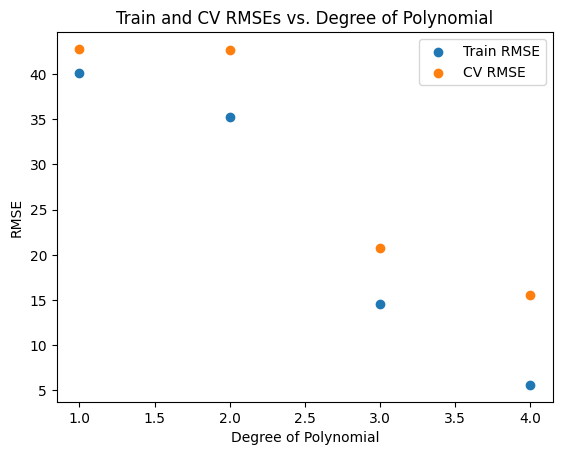

In [ ]:
# Plot the results
plt.scatter(range(1,5), train_mses[0:4], label='Train RMSE')
plt.scatter(range(1,5), cv_mses[0:4], label='CV RMSE')
plt.xlabel('Degree of Polynomial')
plt.ylabel('RMSE')
plt.title('Train and CV RMSEs vs. Degree of Polynomial')
plt.legend()
plt.show()

As the order increases, training set RMSE decreases. CV set RMSE follows the trend but the gap between the two starts to increase at degree=4. The 3rd order model works the best.

In [ ]:
#Depoly the model as a trained predictor
## Try 4th order model first
preprocessing=make_pipeline(PolynomialFeatures(degree=4,include_bias=False),StandardScaler())
model=LinearRegression()
train_pipe=make_pipeline(preprocessing,model)
train_pipe.fit(X_train,y_train)
y_pred_t=train_pipe.predict(X_test)
mse_t = mean_squared_error(y_test, y_pred_t, squared=False)
print('Root Mean Squared Error for test set for 4th oder model:', mse_t)

Root Mean Squared Error for test set for 4th oder model: 125741730493.07803


Using test set, we rule out the 4th order model.  The RMSE is too big.

In [ ]:
# Select 3rd order model as the final ML model
preprocessing=make_pipeline(PolynomialFeatures(degree=3,include_bias=False),StandardScaler())
model=LinearRegression()
train_pipe=make_pipeline(preprocessing,model)
train_pipe.fit(X_train,y_train)
y_pred_t=train_pipe.predict(X_test)
mse_t = mean_squared_error(y_test, y_pred_t, squared=False)
print('Root Mean Squared Error for test set for 3rd oder model:', mse_t)

Root Mean Squared Error for test set for 3rd oder model: 32.07247067957224


joblib.dump saves a file in under 'sample_data' folder.  You can download it to your local drive.  This is your model from Machine Learning Task 1.  You can reload it in other codes to make predictions directly with new data.

In [ ]:
joblib.dump(train_pipe, 'physical_catapult_regression.pkl')

['physical_catapult_regression.pkl']

The following shows how you use your saved model in other codes.

In [ ]:
final_model=joblib.load('physical_catapult_regression.pkl')
print("first 5 data points")
print(X_test.head())
print("the predicted launch distance")
y_pred_t=final_model.predict(X_test)
print(y_pred_t[0:5])
print("the actual launch distance")
print(y_test.head())



first 5 data points
    ball_mass  firing _height  band_length
33       94.1             9.0         42.0
99       22.9            22.1         43.0
81       94.1             6.6         33.0
73       94.1             6.6         46.0
27       61.3            18.0         41.8
the predicted launch distance
[265.9 165.1  75.4 283.5 199.2]
the actual launch distance
33    264.0
99    177.9
81     72.1
73    281.7
27    176.5
Name: launch_distance, dtype: float64
